<a href="https://colab.research.google.com/github/FranziskoB/Regressao_simples_multipla/blob/main/02_Regress%C3%A3o_linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELAGEM DE UMA REGRESSÃO LINEAR MULTIPLA

## Bibliotecas

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

## Importando os dados

In [ ]:
paises = pd.read_csv('https://raw.githubusercontent.com/FranziskoB/Regressao_simples_multipla/main/dados/paises.csv')

In [ ]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   idade   50 non-null     int64  
 3   horas   50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
paises.head(5)

,pais,cpi,idade,horas
0,Argentina,3.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0
3,Belgium,7.1,67,30.1
4,Brazil,4.0,59,35.0


In [ ]:
paises.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.799999
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.099998


In [ ]:
import plotly.express as px

fig = px.scatter_3d(paises, z='cpi', y='idade', x='horas',size_max=1)
fig.update_traces(marker_size=2)
fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    title_text='Paises'
)
fig.show()

## Correlação entre as variáveis do dataset

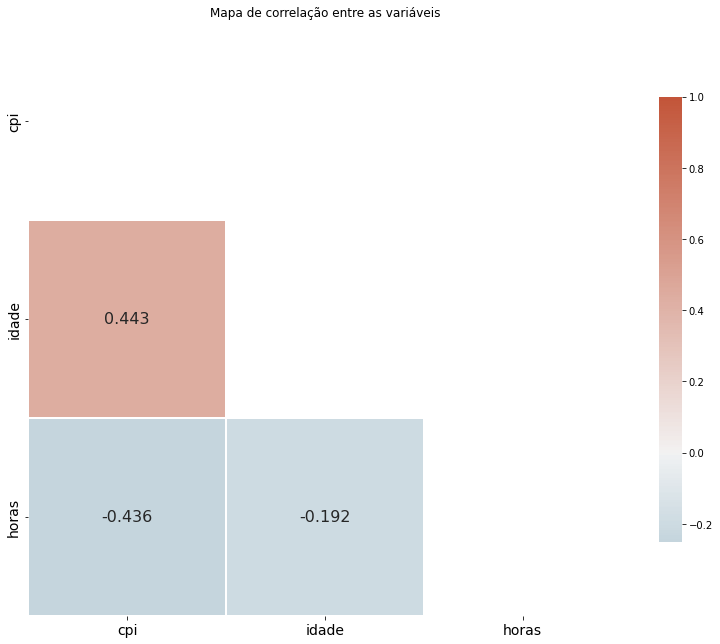

In [ ]:
paises_variaveis= paises[['cpi','idade','horas']]
corr = paises_variaveis.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(paises_variaveis.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Mapa de correlação entre as variáveis')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

##Estimando o modelo

In [ ]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(paises[['idade','horas']])
Y_sm=paises[['cpi']]
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(Y_sm, X_sm).fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           0.000101
Time:                        19:19:14   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O modelo apresentou R² = 0.324, intercepto igual a 11.97 e estatisticamente diferente de 0 para nivel de confiança de 95%. O coefiente angular da variável idade ficou igual a 0.0997 e estatíticamente diferente de 0. O coefiente angular da variável horas ficou igual a -0.4013 e estatíticamente diferente de 0.

In [ ]:
# mostrando as previsões para o mesmo conjunto passado
paises['yhat']=results.predict(X_sm)
paises['erro']=paises['yhat']-paises['cpi']

In [ ]:
print(results.params.const)

11.971917629129596


In [ ]:
paises.head(5)

,pais,cpi,idade,horas,yhat,erro
0,Argentina,3.9,72,35.0,5.103394,1.203394
1,Australia,8.7,64,32.0,5.509820,-3.190180
2,Austria,7.9,72,32.0,6.307404,-1.592596
3,Belgium,7.1,67,30.1,6.571454,-0.528546
4,Brazil,4.0,59,35.0,3.807319,-0.192681


## gráficos

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# gerando os pontos
idade = np.linspace(paises.idade.min(), paises.idade.max(), 80)
horas = np.linspace(paises.horas.min(), paises.horas.max(), 80)
yGrid, xGrid = np.meshgrid(horas,idade)
cpi = results.params.const + xGrid * results.params.idade + yGrid * results.params.horas
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    title_text='Paises'
)
# adding surfaces to subplots.
fig.add_trace(
    go.Surface(x=horas, y=idade, z=cpi ,colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']], showscale=False),
)

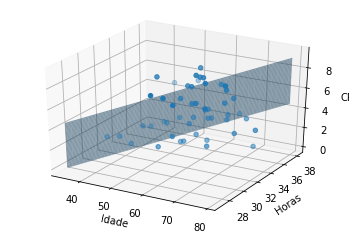

In [ ]:
# create the figure
fig = plt.figure()

# add axes
ax = fig.add_subplot(111,projection='3d')

idade = np.linspace(paises.idade.min(), paises.idade.max(), 80)
horas = np.linspace(paises.horas.min(), paises.horas.max(), 80)
xGrid,yGrid = np.meshgrid(idade,horas)
z = (results.params.const + xGrid * results.params.idade + yGrid * results.params.horas) 

# plot the plane
ax.plot_surface(idade,horas, z, alpha=0.5)
ax.scatter(xs=paises.idade, ys=paises.horas, zs=paises.cpi)
ax.set_xlabel('Idade')
ax.set_ylabel('Horas')
ax.set_zlabel('CPI')
plt.show()

## Realizando predições

Para idade igual a 50 e horas igual 30

In [ ]:
def predicao(xidade,yhoras,results): # Criando função para realizar a predição e calcular o intervalo de confiança para nivel de confiança de 95% 
  x_pr=pd.DataFrame([[xidade,yhoras],[0,0]],columns=['idade','horas'])
  sm_pred = results.get_prediction(sm.add_constant(x_pr))\
                  .summary_frame(alpha=0.05)
  resultado=sm_pred.iloc[0:1]
  resultado=resultado[['mean','mean_ci_lower','mean_ci_upper']]
  resultado.columns=['yhat','Limite_inferior','Limite_Superior']
  resultado['idade']= x_pr.iloc[0:1].idade
  resultado['horas']= x_pr.iloc[0:1].horas
  return resultado

In [ ]:
predicao(50,30,results)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,yhat,Limite_inferior,Limite_Superior,idade,horas
0,4.91672,3.654422,6.179017,50,30
